In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images,train_labels), (test_images, test_labels)=tf.keras.datasets.mnist.load_data()
train_images=train_images.reshape((60000,28*28))/255.0
test_images=test_images.reshape((10000,28*28))/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


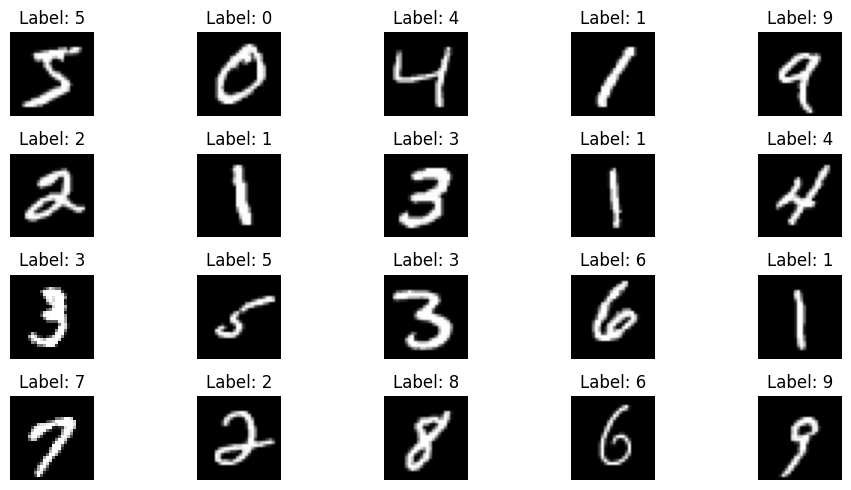

In [3]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')  # Convert 1D back to 2D
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')  # Hide axis for cleaner look

plt.tight_layout()
plt.show()

In [4]:
model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [6]:
history=model.fit(train_images, train_labels, epochs=30,batch_size=128,
                  validation_data=(test_images,test_labels))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.8693 - loss: 0.4228 - val_accuracy: 0.9656 - val_loss: 0.1026
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9612 - loss: 0.1272 - val_accuracy: 0.9738 - val_loss: 0.0822
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9690 - loss: 0.0976 - val_accuracy: 0.9795 - val_loss: 0.0666
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.9731 - loss: 0.0840 - val_accuracy: 0.9790 - val_loss: 0.0678
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.9769 - loss: 0.0702 - val_accuracy: 0.9778 - val_loss: 0.0716
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9789 - loss: 0.0657 - val_accuracy: 0.9807 - val_loss: 0.0644
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9824 - loss: 0.0550 - val_accuracy: 0.9793 - val_loss: 0.0658
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9827 - loss: 0.0520 - 

In [7]:
test_loss,test_acc=model.evaluate(test_images, test_labels)
print(f"\n Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9835 - loss: 0.0717

 Test accuracy: 0.9865


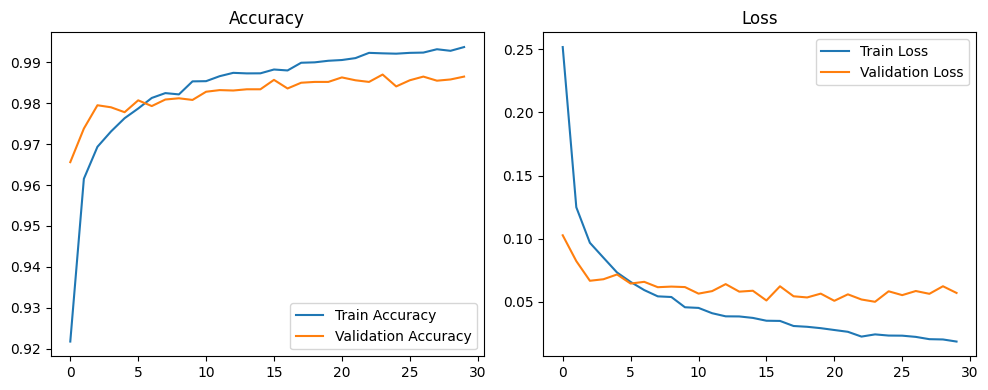

In [8]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


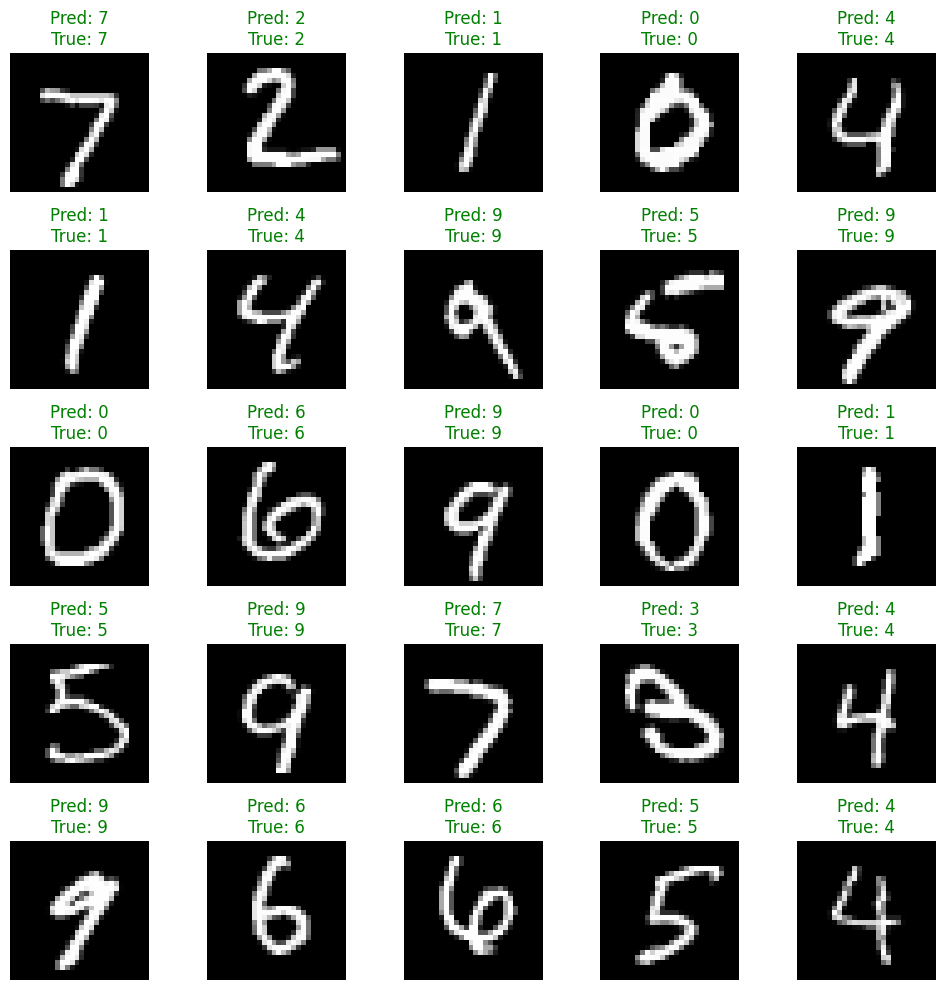

In [9]:
# Make predictions and visualize
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()